In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from os.path import join

c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
c:\Users\Mumu\miniconda3\envs\crime_patterns\Lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
### center, dispersion, and clustering of crime

In [3]:
data_dir = r"C:\Users\Mumu\Desktop\Bonn Econ\Winter22-23\EPP\Spatial Econometrics - Materials\Test data"

In [4]:
db = pd.read_csv(join(data_dir, r"tokyo_clean.csv"))

In [5]:
db.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10000 non-null  object 
 1   longitude             10000 non-null  float64
 2   latitude              10000 non-null  float64
 3   date_taken            10000 non-null  object 
 4   photo/video_page_url  10000 non-null  object 
 5   x                     10000 non-null  float64
 6   y                     10000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [7]:
from scipy import stats

In [13]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [15]:
len(m1)

2000

(-3.6670514209232072, 3.5146854517656085)

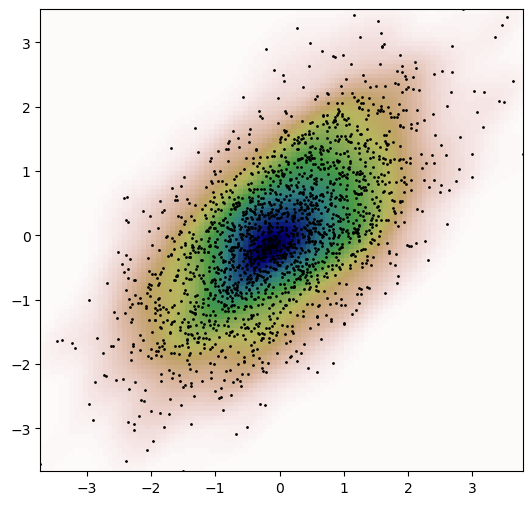

In [8]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# <markdowncell>

# The we apply the KDE to the data:

# <codecell>

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

# <markdowncell>

# Finally we plot the estimated bivariate distribution as a colormap, and plot the individual
# data points on top.

# <codecell>

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])


In [10]:
positions.shape

(2, 10000)

In [12]:
values

(2, 2000)

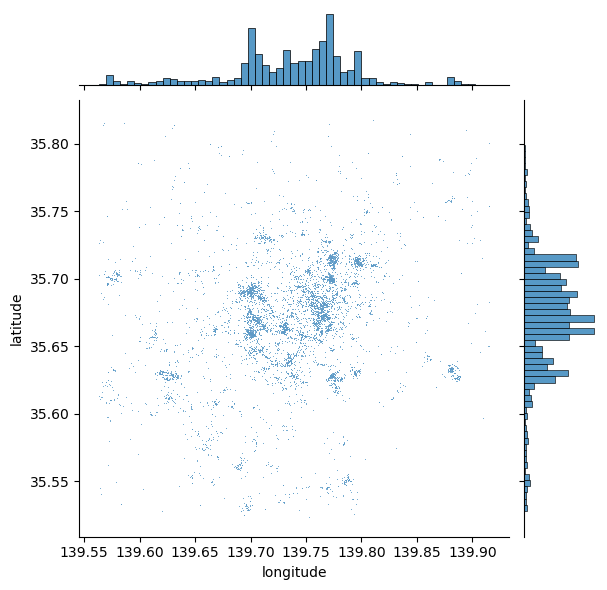

In [9]:
# Generate scatter plot
seaborn.jointplot(x="longitude", y="latitude", data=db, s=0.5)

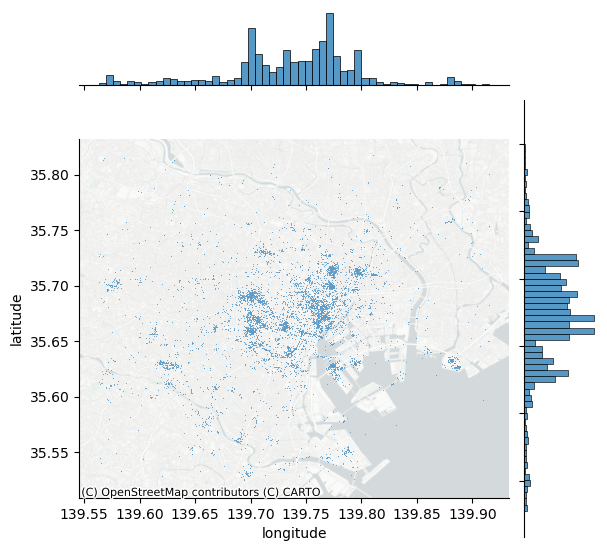

In [10]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="longitude", y="latitude", data=db, s=0.5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
)

C:\Users\Mumu\AppData\Local\Temp\ipykernel_5984\3487284.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  seaborn.kdeplot(
C:\Users\Mumu\AppData\Local\Temp\ipykernel_5984\3487284.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(


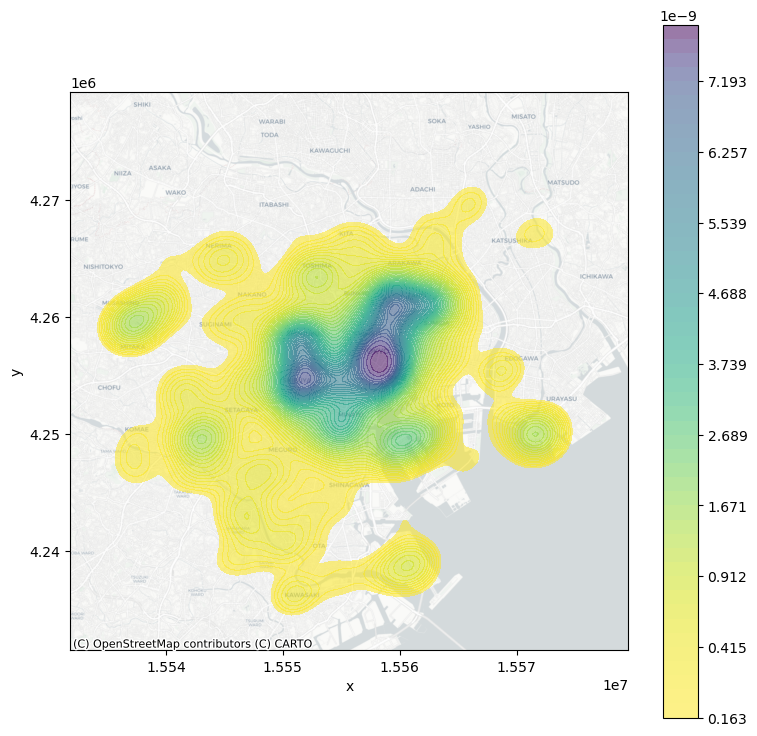

In [14]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    data = db,
    x = db["x"],
    y = db["y"],
    n_levels=50,
    shade=True,
    alpha=0.55,
    cmap="viridis_r",
    cbar=True, 
    shade_lowest=False
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
#ax.set_axis_off()

In [15]:
from pointpats import centrography

In [16]:
mean_center = centrography.mean_center(db[["x", "y"]])
med_center = centrography.euclidean_median(db[["x", "y"]])

In [18]:
mean_center

array([15555485.40274061,  4255558.40964842])

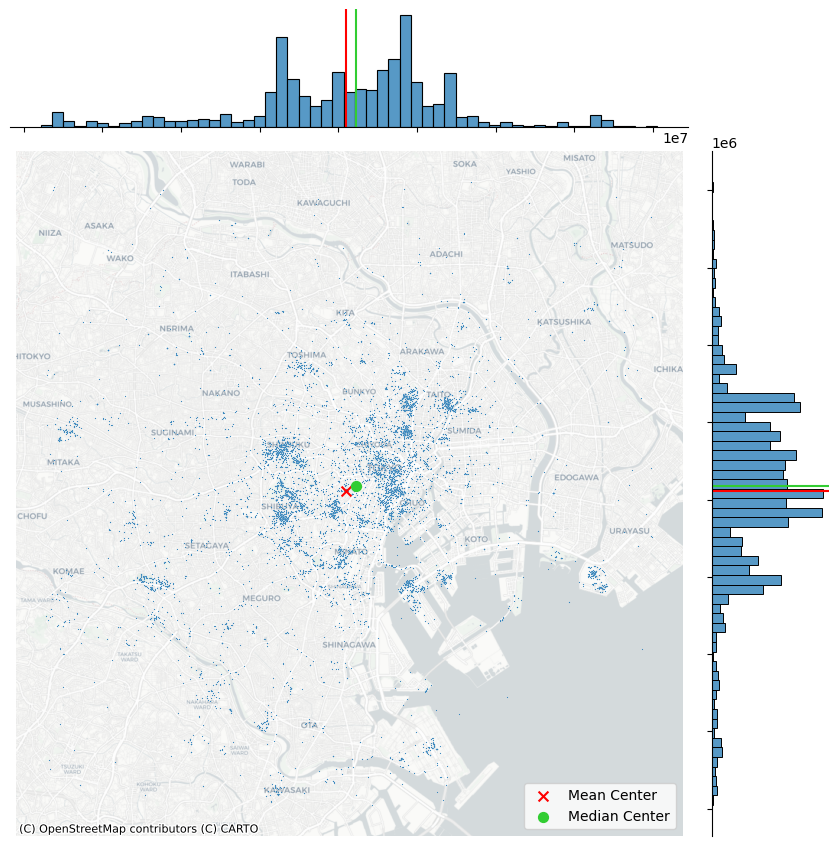

In [17]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x="x", y="y", data=db, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color="red", marker="x", s=50, label="Mean Center"
)
joint_axes.ax_marg_x.axvline(mean_center[0], color="red")
joint_axes.ax_marg_y.axhline(mean_center[1], color="red")
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center,
    color="limegreen",
    marker="o",
    s=50,
    label="Median Center"
)
joint_axes.ax_marg_x.axvline(med_center[0], color="limegreen")
joint_axes.ax_marg_y.axhline(med_center[1], color="limegreen")
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, source=contextily.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [ ]:
'''
## TODO:
1. calculate tightest alpha shape
2. calculate quadrat count
3. DBSCAN clustering of points 
4. clustering along networks



'''